# Imports

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from projetannuel import SVM, SVMKernelType, SoftMargin
import projetannuel

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [50]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      1
])

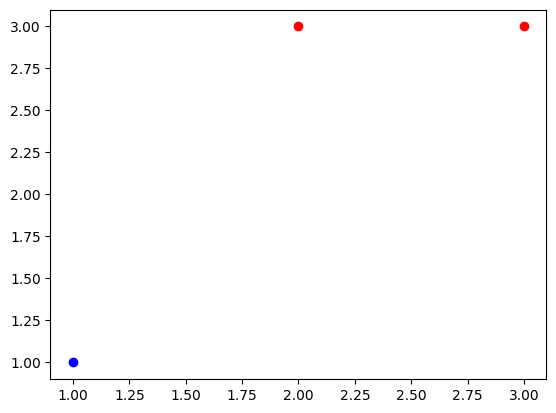

<Figure size 640x480 with 0 Axes>

In [3]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

# RBF

In [4]:
import projetannuel

In [5]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 1
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo = "gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 1.0


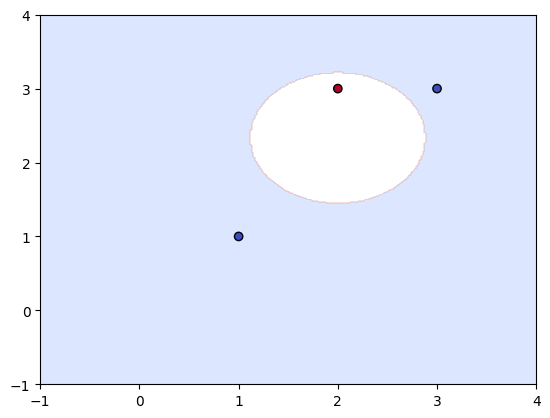

<Figure size 640x480 with 0 Axes>

In [6]:
xx, yy = np.meshgrid(np.linspace(-1, 4, 300), np.linspace(-1, 4, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(model.num_classes + 1) - 0.5, cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()


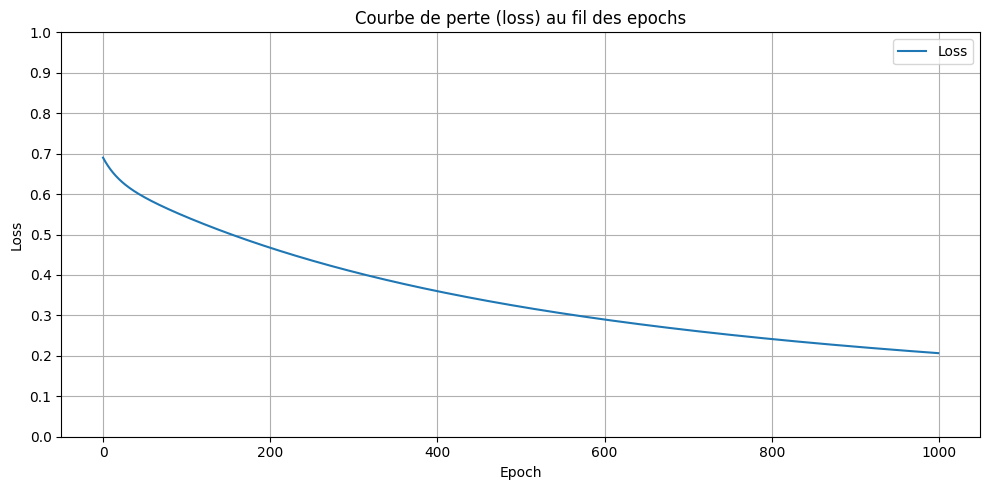

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [51]:
model = SVM(SVMKernelType.Linear(),SoftMargin.Hard())
model.train(X.tolist(), Y.tolist())

OSQP status   = Solved(Solution { x: [0.9999999700000122, 3.9999998700000625, 2.9999999000000512], y: [0.9999999999999861, 0.0, 0.0, 0.0], polish_status: Successful, obj_val: -3.999999870000106, pri_res: 0.0, dua_res: 1.3572922298297562e-14 })
Iterations    = 50
Solve time    = 685.1µs
alpha_full    = [0.9999999700000122, 3.9999998700000625, 2.9999999000000512]


In [52]:
Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")


Accuracy Score : 1.0


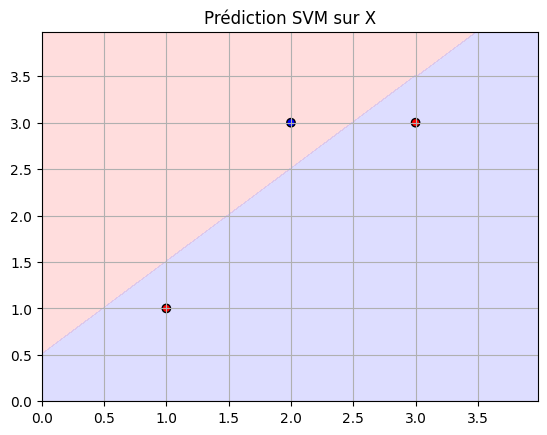

In [53]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.4, colors=["#FFAAAA", "#AAAAFF"])
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr, edgecolors='k')
plt.title("Prédiction SVM sur X")
plt.grid(True)
plt.show()


### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [59]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

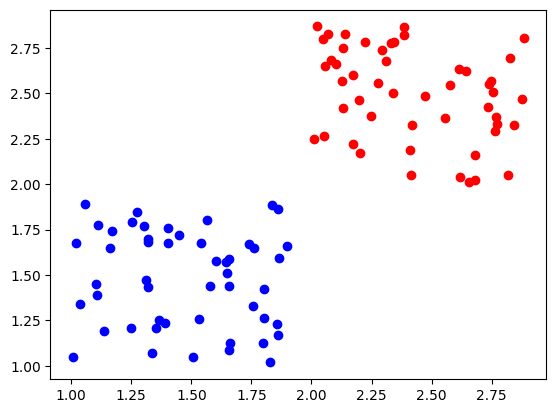

<Figure size 640x480 with 0 Axes>

In [15]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

# RBF

In [10]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma=1,
    k=2
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 1.0


C:\Users\leopo\AppData\Local\Temp\ipykernel_31044\1043488661.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = projetannuel.float_labels(Y)
C:\Users\leopo\AppData\Local\Temp\ipykernel_31044\1043488661.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")


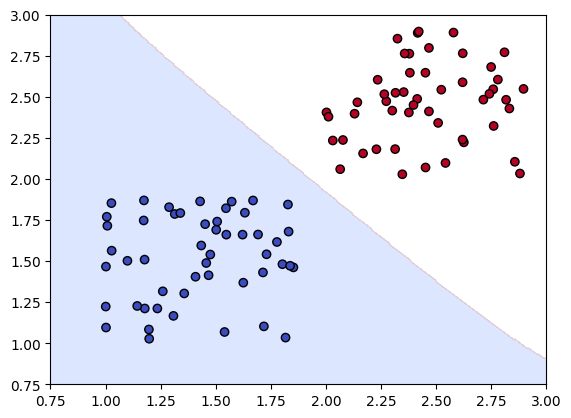

<Figure size 640x480 with 0 Axes>

In [11]:
xx, yy = np.meshgrid(np.linspace(0.75, 3, 300), np.linspace(0.75, 3, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(model.num_classes + 1) - 0.5, cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

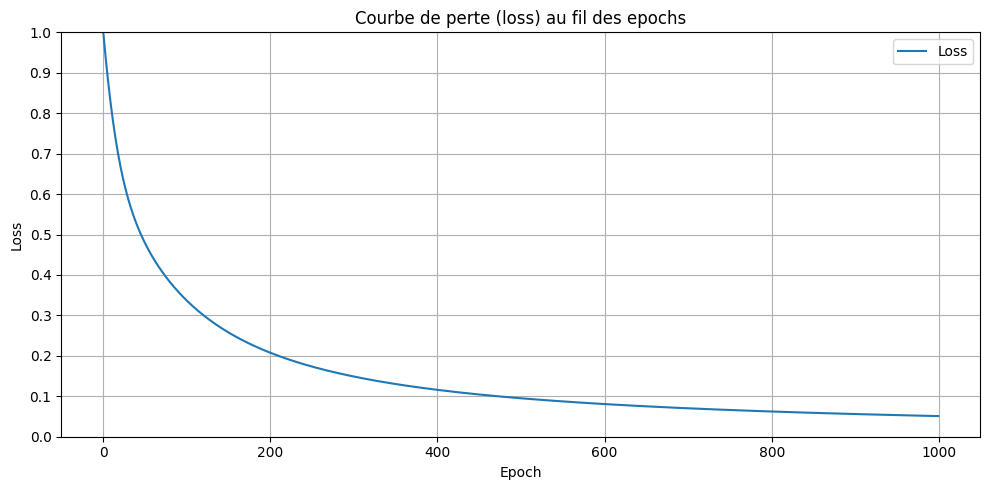

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [60]:
model = SVM(SVMKernelType.Linear(),SoftMargin.Hard()) 
model.train(X.tolist(), Y.ravel().tolist())

Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y.ravel()), Y_pred)}")

OSQP status   = Solved(Solution { x: [-3.663442520396962e-18, -1.5645356751028412e-18, -1.935483147854828e-18, -1.3558921815942952e-18, -6.91382555067561e-19, -4.7330959069039326e-18, -1.5960958134731697e-18, -7.882927769658443e-18, -8.21217272848823e-19, -3.724524905982074e-18, -8.494896662466651e-19, -1.51500829159384e-18, -1.4899900126292286e-18, -1.6488178501290982e-18, -8.897235667403274e-19, -1.2604765754968695e-18, -2.9144642525279397e-18, -3.1874394662133787e-18, -1.2015458270117479e-18, -1.936193978538328e-18, -3.3390051535163905e-18, -5.399825105189507e-18, -1.5940864084603503e-18, 18.644360807598837, -3.2261735725798244e-18, -5.705550657663864e-19, -1.0037700674057614e-18, -4.054615991908944e-18, -2.721108992141657e-18, -9.212042327726518e-19, -5.84960297615585e-18, -2.1212933593921185e-18, -3.8269206667682176e-18, -3.1837684907945074e-18, -2.894648740968024e-18, -2.603470522603598e-18, -5.821842142742971e-19, -1.9905869046092798e-18, -2.147028563638581e-18, -5.9033992779982

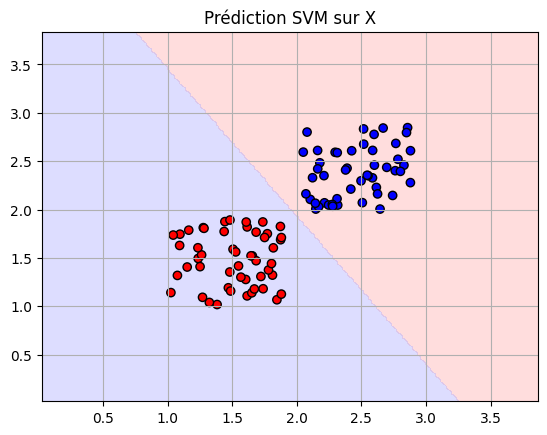

In [62]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.4, colors=["#FFAAAA", "#AAAAFF"])
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr, edgecolors='k')
plt.title("Prédiction SVM sur X")
plt.grid(True)
plt.show()


### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [64]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

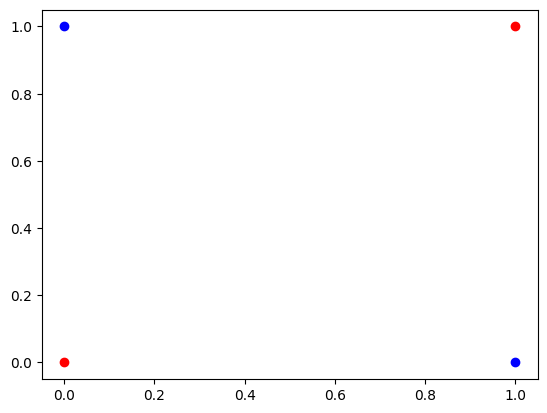

<Figure size 640x480 with 0 Axes>

In [14]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

# RBF

In [15]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 4
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 1.0


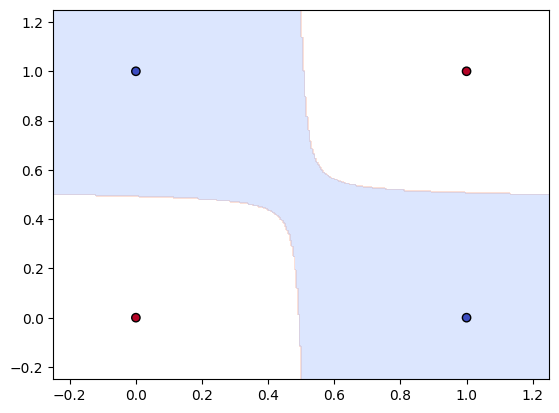

<Figure size 640x480 with 0 Axes>

In [16]:
xx, yy = np.meshgrid(np.linspace(-0.25, 1.25, 300), np.linspace(-0.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(model.num_classes + 1) - 0.5, cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

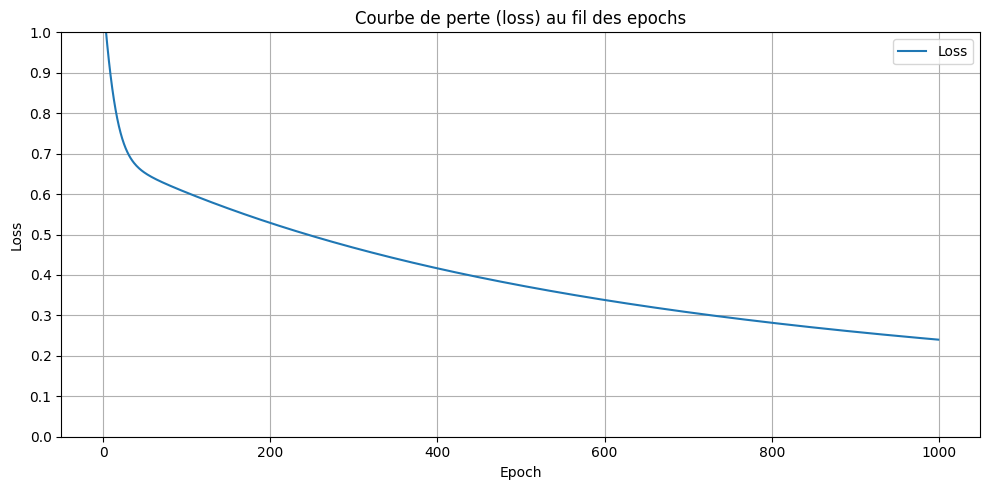

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [65]:
model = SVM(SVMKernelType.polynomial(2),SoftMargin.Hard()) 
model.train(X.tolist(), Y.tolist())

Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

OSQP status   = Solved(Solution { x: [2.666666593333336, 2.666666593333336, 3.3333332400000035, 1.9999999466666685], y: [-0.999999966666667, 0.0, 0.0, 0.0, 0.0], polish_status: Successful, obj_val: -5.333333186666663, pri_res: 2.2204460381697672e-16, dua_res: 1.831867991649213e-15 })
Iterations    = 50
Solve time    = 507.8µs
alpha_full    = [2.666666593333336, 2.666666593333336, 3.3333332400000035, 1.9999999466666685]
Accuracy Score : 1.0


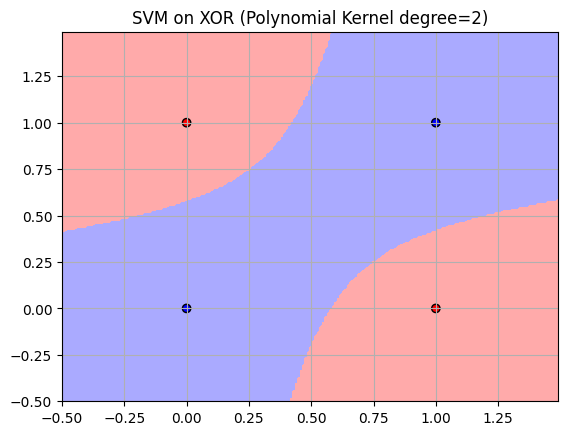

In [66]:
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=["#AAAAFF", "#FFAAAA"])
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr, edgecolors='k')
plt.title("SVM on XOR (Polynomial Kernel degree=2)")
plt.grid(True)
plt.show()


























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [67]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

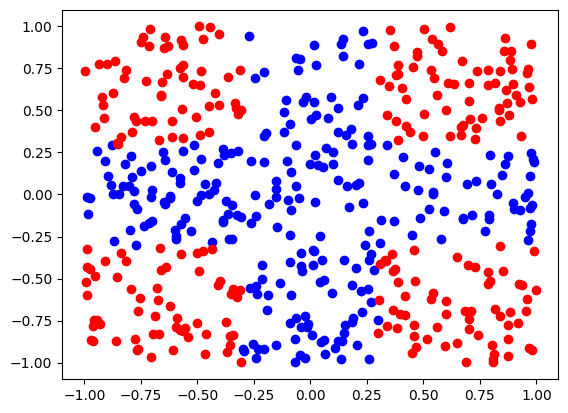

<Figure size 640x480 with 0 Axes>

In [19]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

# RBF

In [20]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 10,
    k = 100
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 0.964


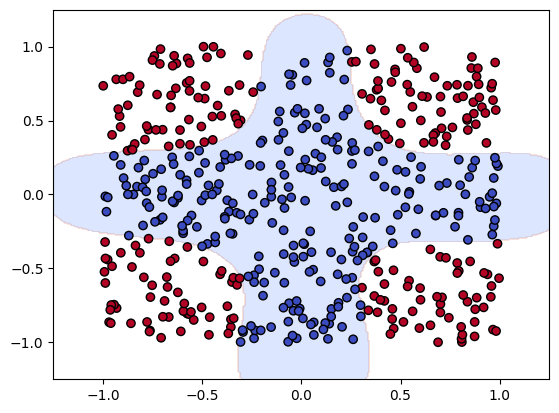

<Figure size 640x480 with 0 Axes>

In [21]:
xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 300), np.linspace(-1.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(model.num_classes + 1) - 0.5, cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

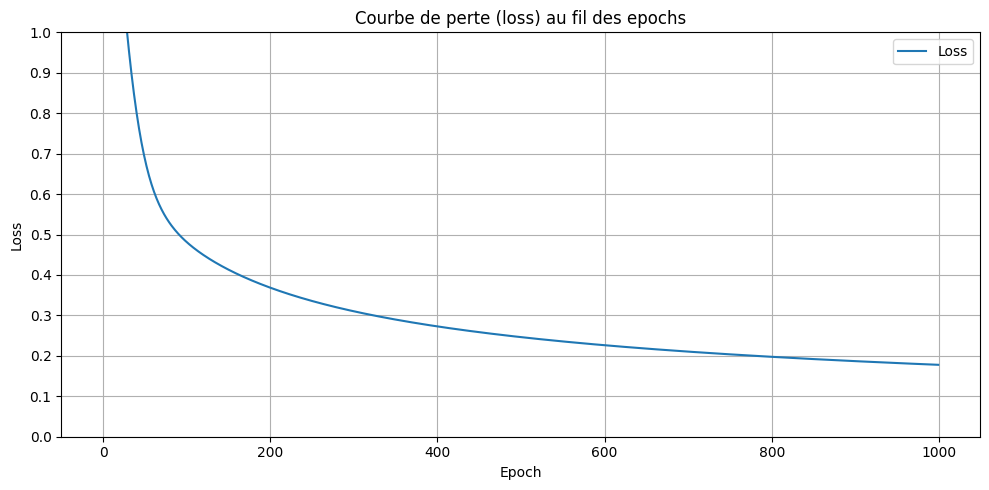

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [68]:
model = SVM(SVMKernelType.polynomial(25),SoftMargin.Hard())
model.train(X.tolist(), Y.tolist())

Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

OSQP status   = Solved(Solution { x: [-1.6271563007904913e-8, -5.17430444116904e-11, 2.956393465238102e-5, -6.741516561791651e-9, -6.946114352762617e-10, -1.8120366819007121e-9, 2.319041245270675e-9, 5.805625849120333e-10, -9.372656958763817e-10, 1.800091318904656e-9, -4.795966634017436e-10, 0.8069240925213261, -4.619397122420679e-11, 1.0493345120193182e-9, -4.628997289022824e-9, -4.675619613668042e-9, -6.231571141507711e-11, -2.8113973378415026e-10, -6.149331776090489e-9, 0.019241509974604696, 4.4533999118344476e-10, 1.2682645669965067e-10, -8.260567809095658e-9, -5.869676968925913e-10, -9.466862495617934e-10, -7.492421913690602e-9, -1.6490221185414458e-9, -1.6621280222634712e-9, -3.0946632761448647e-9, -2.8040687285271446e-10, -2.1064238581293145e-10, -7.241103484527771e-10, 0.07711114042300936, -6.0974747179863375e-9, -4.261699448645896e-9, 1.6563814812344843e-9, 5.039520944078839e-11, -2.334158196621111e-11, -8.224888875942584e-10, 1.751343558567373e-10, -6.932269640924135e-10, 1.2

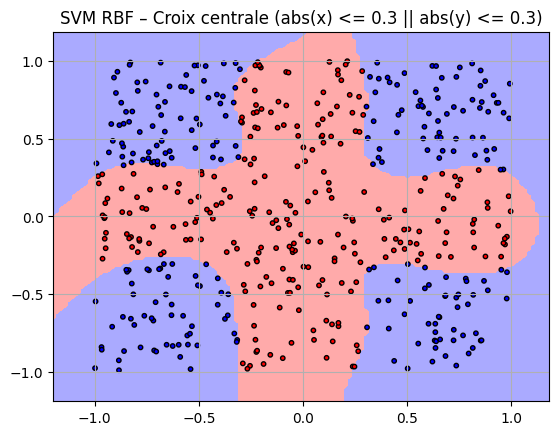

In [70]:
h = 0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=["#AAAAFF", "#FFAAAA"])
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr, edgecolors='k', s=10)
plt.title("SVM RBF – Croix centrale (abs(x) <= 0.3 || abs(y) <= 0.3)")
plt.grid(True)
plt.show()


### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [71]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

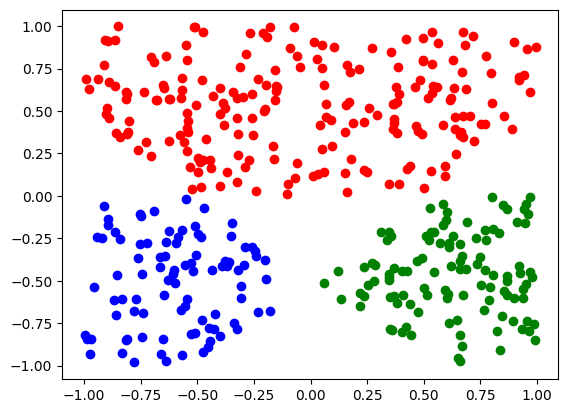

<Figure size 640x480 with 0 Axes>

In [24]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# RBF

#### Sans multi-classe

In [25]:
models = []

for i in range(3):
    y_i = [row[i] for row in Y]
    y_i = projetannuel.float_labels(y_i)
    model_i = projetannuel.RBF(X, y_i, gamma=1, k=4)
    model_i.train_classification(epochs=1000, learning_rate=0.1, algo="gradient-descent")
    models.append(model_i)
    
Y_pred = []
for x in X:
    Y_pred.append([model.predict(x) for model in models])

Y_acc = [list(y) for y in Y]     
print(f"Accuracy score : {projetannuel.accuracy_score(Y_acc, Y_pred)}")

Accuracy score : 0.9926470588235294


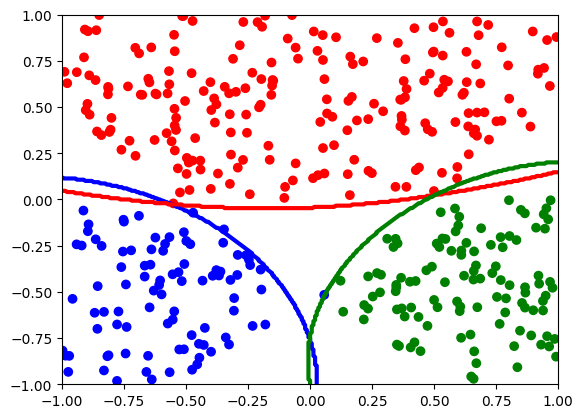

<Figure size 640x480 with 0 Axes>

In [26]:
colors_pred = ["blue", "red", "green"]

plt.scatter(np.array(X)[:,0], np.array(X)[:,1], 
            c=[colors_pred[np.argmax(y)] for y in Y_pred])

xx, yy = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

colors_boundary = ["blue", "red", "green"]

for idx, model in enumerate(models):
    Z = np.array([float(model.predict(list(p))) for p in grid])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], colors=[colors_boundary[idx]], linewidths=3)

plt.show()
plt.clf()


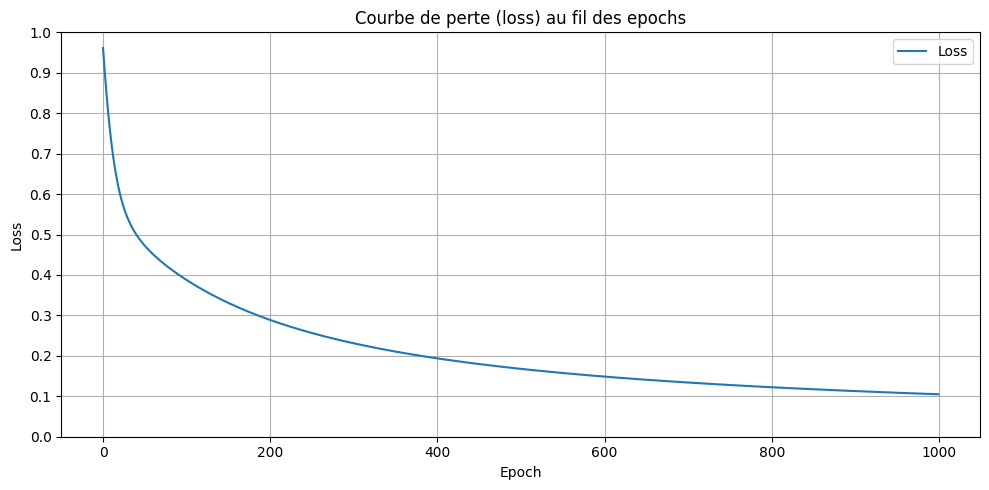

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

#### Avec multi-classe

In [28]:
new_Y = []
for line in Y:
    new_Y.append(list(line).index(1))
print(new_Y)

[2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 

In [29]:
y = projetannuel.float_labels(new_Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 4
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(new_Y), Y_pred)}")

Accuracy Score : 0.9975490196078431


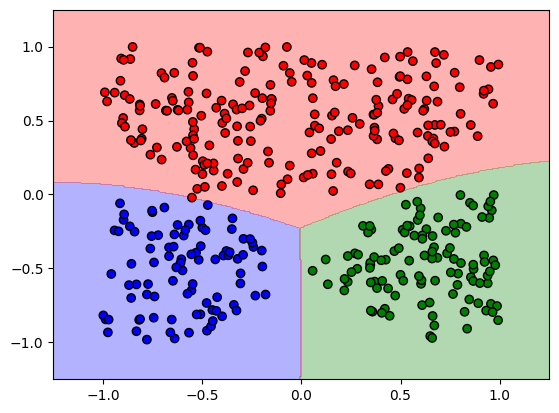

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.colors as mcolors

cmap_custom = mcolors.ListedColormap(['blue', 'red', 'green'])

xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 300), np.linspace(-1.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(model.num_classes + 1) - 0.5, cmap=cmap_custom)

plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap=cmap_custom, edgecolor='k')

plt.show()
plt.clf()


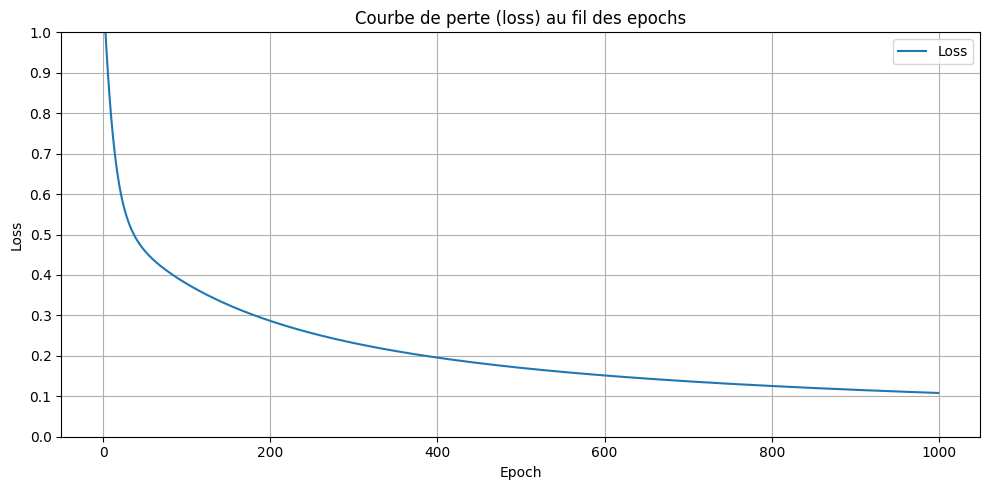

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [72]:
y_labels = np.argmax(Y, axis=1)


In [74]:
svms = []
for i in range(3):
    y_bin = [1.0 if label == i else -1.0 for label in y_labels]
    svm = SVM(SVMKernelType.rbf(1.5),SoftMargin.Hard())
    svm.train(X.tolist(), y_bin)
    svms.append(svm)


OSQP status   = Solved(Solution { x: [-2.1444955635805384e-18, -3.2611072921958117e-17, -6.165442547155762e-17, -6.693009627958421e-17, -7.957224273668018e-17, -1.461055067966463e-16, -7.568715967342547e-17, -2.4193179239553796e-17, -2.060402476422954e-16, 0.5453035809511786, -8.740188087418811e-17, -1.2911511830337465e-16, -1.6947344454592426e-16, -1.989180699890017e-16, -9.142056544472465e-17, -5.3307237410414954e-17, -1.1276459573163557e-16, -2.232716385662506e-18, -1.999898313597156e-16, -1.0513404652488874e-16, -6.077542098989679e-17, -2.0739876895530017e-16, -7.061926727675262e-17, -2.0791948245702119e-16, -1.818927012168722e-16, 1.3258475135361791e-17, -1.3673928084864388e-16, -8.172210891939877e-17, -1.4734563545522835e-16, -7.351271857521626e-17, -1.7840880178267556e-16, -4.314282885929559e-17, -5.8746350266172025e-18, -5.579691869285316e-17, -4.1995893314888747e-17, -1.0279377391266529e-16, -2.0236633448258773e-16, -5.184126161406406e-18, -1.9961517148366157e-16, -1.061027345

In [75]:
def predict_ova(svms, X):
    preds = []
    for x in X:
        scores = [svm.predict([x])[0] for svm in svms]
        preds.append(np.argmax(scores))
    return preds

y_pred = predict_ova(svms, X)


In [76]:
print(f"Accuracy Score : {projetannuel.accuracy_score(list(y_labels), y_pred)}")


Accuracy Score : 1.0


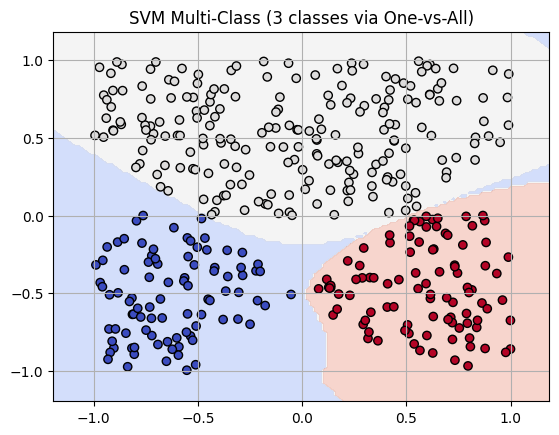

In [77]:
h = 0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(predict_ova(svms, grid)).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], cmap="coolwarm", alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap="coolwarm", edgecolors="k")
plt.title("SVM Multi-Class (3 classes via One-vs-All)")
plt.grid(True)
plt.show()


### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [78]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

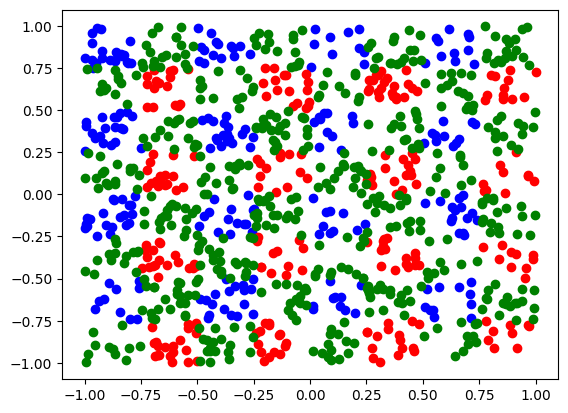

<Figure size 640x480 with 0 Axes>

In [33]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# RBF

#### Sans multi-classe

In [34]:
models = []

for i in range(3):
    y_i = [row[i] for row in Y]
    y_i = projetannuel.float_labels(y_i)
    model_i = projetannuel.RBF(X, y_i, gamma=8, k=30)
    model_i.train_classification(epochs=10_000, learning_rate=0.05, algo="gradient-descent")
    models.append(model_i)
    
Y_pred = []
for x in X:
    Y_pred.append([model.predict(x) for model in models])

Y_acc = [list(y) for y in Y]     
print(f"Accuracy score : {projetannuel.accuracy_score(Y_acc, Y_pred)}")

Accuracy score : 0.528


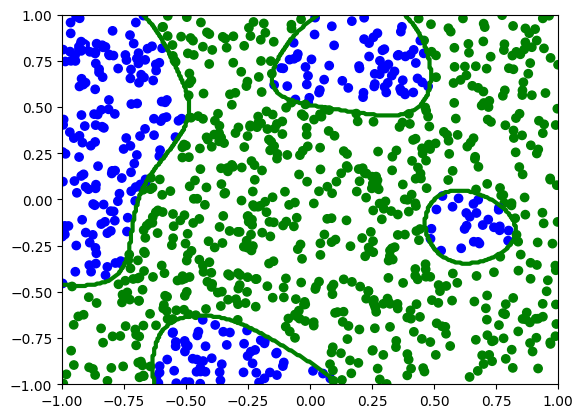

<Figure size 640x480 with 0 Axes>

In [35]:
colors_pred = ["blue", "red", "green"]

plt.scatter(np.array(X)[:,0], np.array(X)[:,1], 
            c=[colors_pred[np.argmax(y)] for y in Y_pred])

xx, yy = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

colors_boundary = ["blue", "red", "green"]

for idx, model in enumerate(models):
    Z = np.array([float(model.predict(list(p))) for p in grid])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors=[colors_boundary[idx]], linewidths=3)

plt.show()
plt.clf()


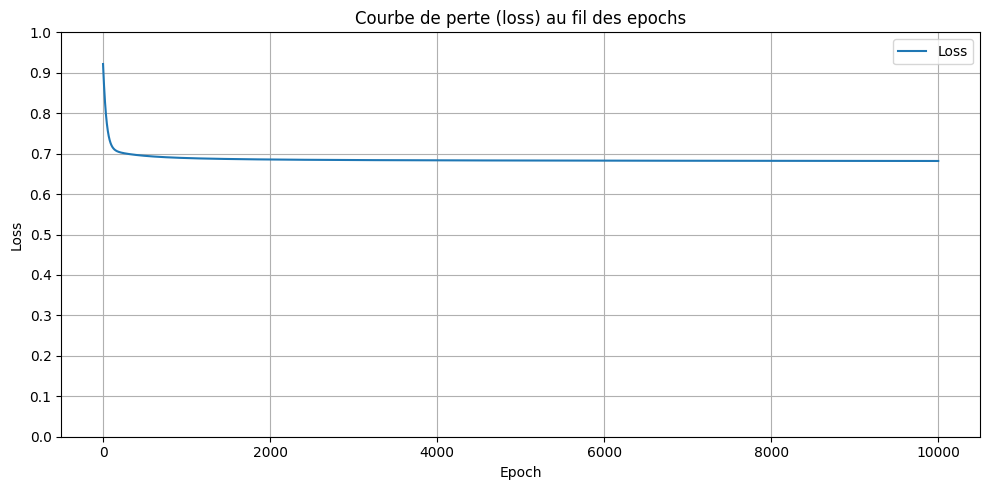

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

#### Avec multi-classe

In [37]:
new_Y = []
for line in Y:
    new_Y.append(list(line).index(1))
print(new_Y)

[2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 

In [38]:
y = projetannuel.float_labels(new_Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 8,
    k = 30
)

model.train_classification(epochs=10_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(new_Y), Y_pred)}")

Accuracy Score : 0.534


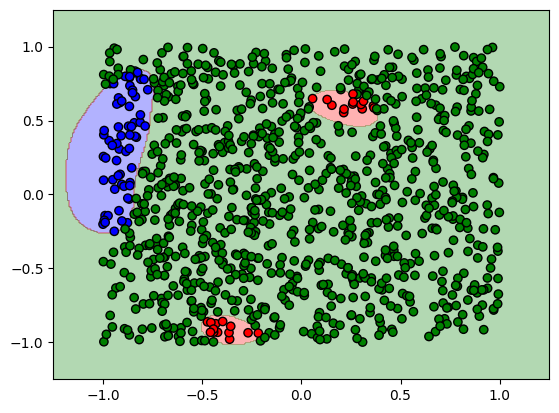

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.colors as mcolors

cmap_custom = mcolors.ListedColormap(['blue', 'red', 'green'])

xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 300), np.linspace(-1.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(model.num_classes + 1) - 0.5, cmap=cmap_custom)

plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap=cmap_custom, edgecolor='k')

plt.show()
plt.clf()

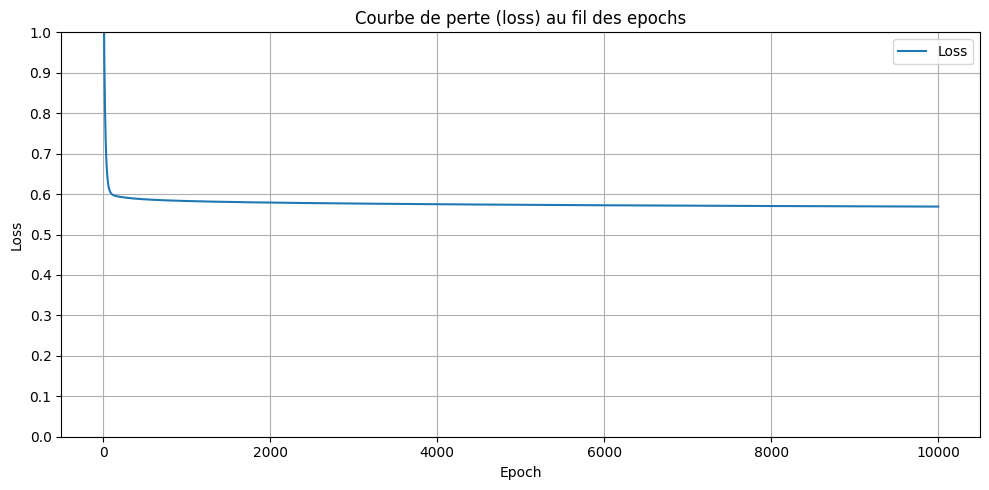

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [80]:
y_labels = np.argmax(Y, axis=1)


svms = []
for i in range(3):
    y_bin = [1.0 if label == i else -1.0 for label in y_labels]
    svm = SVM(SVMKernelType.rbf(10.0),SoftMargin.Hard())  
    svm.train(X.tolist(), y_bin)
    svms.append(svm)

def predict_ova(svms, X):
    return [np.argmax([svm.predict([x])[0] for svm in svms]) for x in X]

y_pred = predict_ova(svms, X)
print(f"Accuracy Score : {projetannuel.accuracy_score(list(y_labels), y_pred)}")


OSQP status   = Solved(Solution { x: [-3.0717227493974306e-5, 329.8152308201901, -5.09327169294932e-8, 6.974283391851941e-6, 7.008978064504773e-7, -3.8399585873216473e-5, -0.00020223566608633853, -8.54893517244245e-7, 6.630518460355655e-6, -1.0016426377175464e-5, -1.6522504326167052e-5, -3.3254648861904645e-8, -5.088902857692447e-6, -1.0406179260856519e-7, -3.676317052290223e-6, -6.680369951782155e-5, -4.617962107786713e-7, -8.957330632665147e-7, 3.28592181854083e-8, -3.6703652627699445e-5, -9.224684671420827e-7, -7.576057574837449e-7, -7.455325385956101e-8, 39.95167591946404, -5.151413881071968e-6, -2.0561598191588066e-5, 1.1116071643156678e-7, -1.7285751321323394e-5, -3.0029180677351227e-5, 2.3330526614893837e-6, -2.2305953515789781e-7, -1.0801173373075167e-6, 3577.435820173457, -5.250248348184908e-6, 2.1429937331351417e-7, -1.0942958607484935e-7, 3.74825781785746e-7, -2.5733108769092138e-5, -8.677615665600935e-6, 28.89442491840736, 1.6777870221953555e-7, -2.240490816247171e-6, 1.204

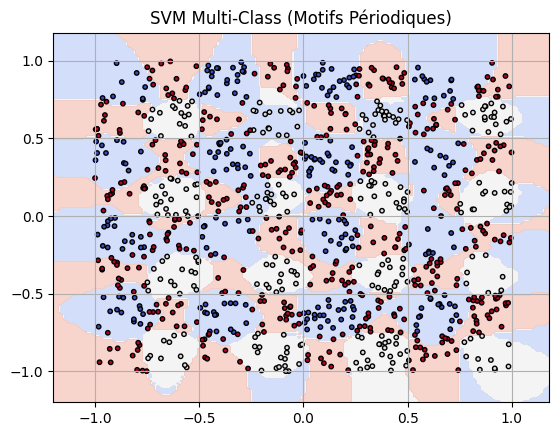

In [81]:
h = 0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(predict_ova(svms, grid)).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], cmap="coolwarm", alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap="coolwarm", edgecolors="k", s=10)
plt.title("SVM Multi-Class (Motifs Périodiques)")
plt.grid(True)
plt.show()


## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [41]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      10,
      5
])

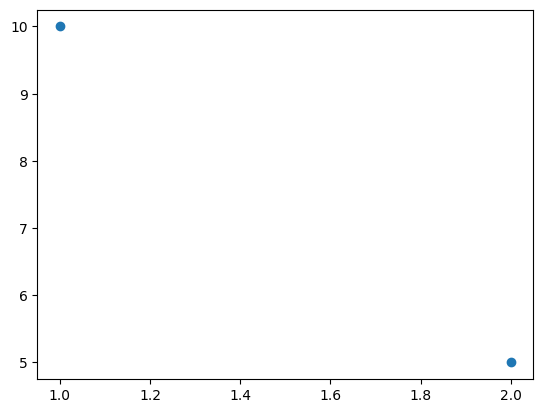

<Figure size 640x480 with 0 Axes>

In [42]:
plt.scatter(X,Y)
plt.show()
plt.clf()

# RBF

In [55]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 5,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 0.00028374956101552545
RMSE : 0.016844867497713523


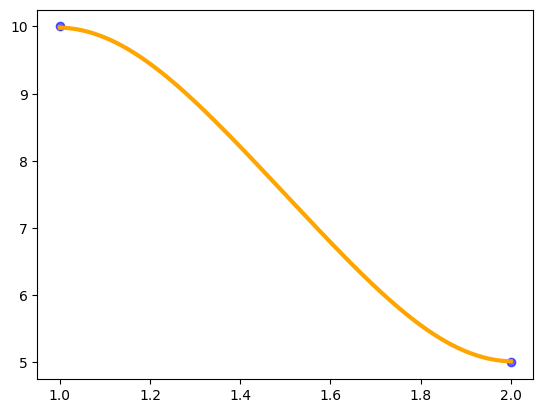

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X, Y, color='blue', alpha=0.6)

x1 = np.linspace(min(X), max(X), 300)
x1_reshaped = x1.reshape(-1, 1)

y_pred = np.array([model.predict(list(p)) for p in x1_reshaped])

plt.plot(x1, y_pred, c='orange', lw=3)

plt.show()
plt.clf()

# SVM

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [59]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

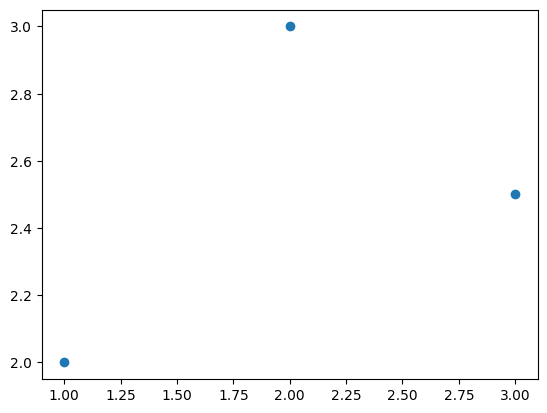

<Figure size 640x480 with 0 Axes>

In [60]:
plt.scatter(X,Y)
plt.show()
plt.clf()

# RBF

In [81]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 1.1970964236728854e-28
RMSE : 1.094119017142507e-14


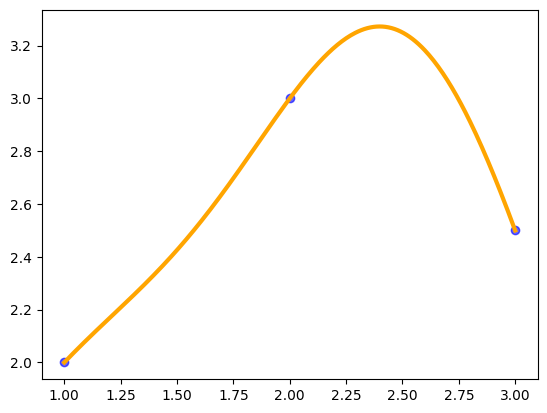

<Figure size 640x480 with 0 Axes>

In [82]:
plt.scatter(X, Y, color='blue', alpha=0.6)

x1 = np.linspace(min(X), max(X), 300)
x1_reshaped = x1.reshape(-1, 1)

y_pred = np.array([model.predict(list(p)) for p in x1_reshaped])

plt.plot(x1, y_pred, c='orange', lw=3)

plt.show()
plt.clf()

# SVM

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [85]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

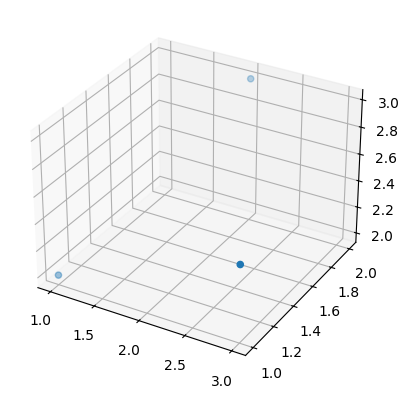

<Figure size 640x480 with 0 Axes>

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# RBF

In [87]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 1.6334679810776417e-27
RMSE : 4.041618464275966e-14


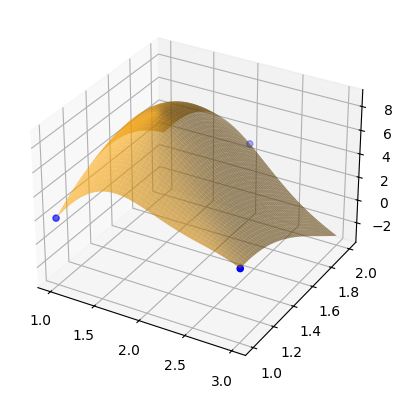

<Figure size 640x480 with 0 Axes>

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()

# SVM

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [89]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

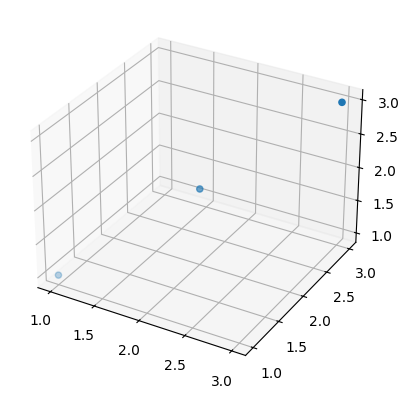

<Figure size 640x480 with 0 Axes>

In [90]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# RBF

In [98]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 0.1,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 6.886098318491749e-28
RMSE : 2.6241376332981753e-14


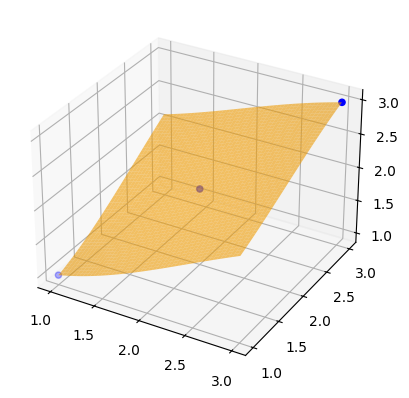

<Figure size 640x480 with 0 Axes>

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()

# SVM

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [106]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

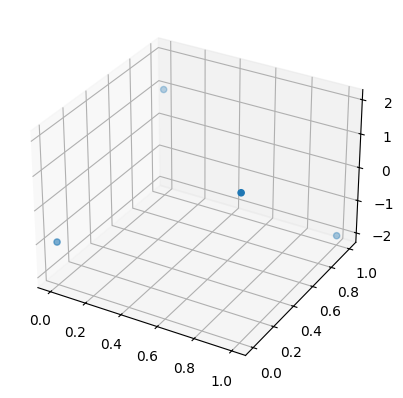

<Figure size 640x480 with 0 Axes>

In [107]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# RBF

In [124]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 30,
    k = 4
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 1.1387254005481553e-25
RMSE : 3.374500556450029e-13


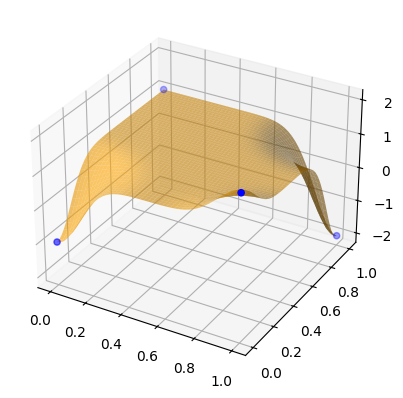

<Figure size 640x480 with 0 Axes>

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()

# SVM